In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from datetime import datetime, timedelta, date
from statsmodels.tsa.stattools import acf, pacf

In [101]:
path = r'\State_Region_corrected.csv'

main_df = pd.read_csv(path)
states = main_df['State / Union territory (UT)'][0:]
nat_share = main_df['National Share (%)'][0:]
states_area = main_df['Area (km2)'][0:]
main_df

,State / Union territory (UT),Area (km2),Region,National Share (%)
0,Rajasthan,342239,Northern,10.550
1,Madhya Pradesh,308350,Central,9.370
2,Maharashtra,307713,Western,9.360
3,Uttar Pradesh,240928,Northern,7.330
4,Gujarat,196024,Western,5.960
5,Karnataka,191791,Southern,5.830
6,Andhra Pradesh,162970,Southern,4.870
7,Odisha,155707,Eastern,4.730
8,Chhattisgarh,135191,Central,4.110
9,Tamil Nadu,130058,Southern,3.950


In [102]:
states
nat_share
states_area

0     342239
1     308350
2     307713
3     240928
4     196024
5     191791
6     162970
7     155707
8     135191
9     130058
10    112077
11     94163
12     88752
13     83743
14     79714
15     78438
16     59146
17     55673
18     53483
19     50362
20     44212
21     42241
22     38863
23     22429
24     22327
25     21081
26     16579
27     10486
28      7096
29      3702
30      1483
31       603
32       492
33       114
Name: Area (km2), dtype: int64

In [103]:
df = gpd.read_file('india_states.geojson')

<GeoAxesSubplot:>

c:\Users\Rajath\miniconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
c:\Users\Rajath\miniconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
c:\Users\Rajath\miniconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


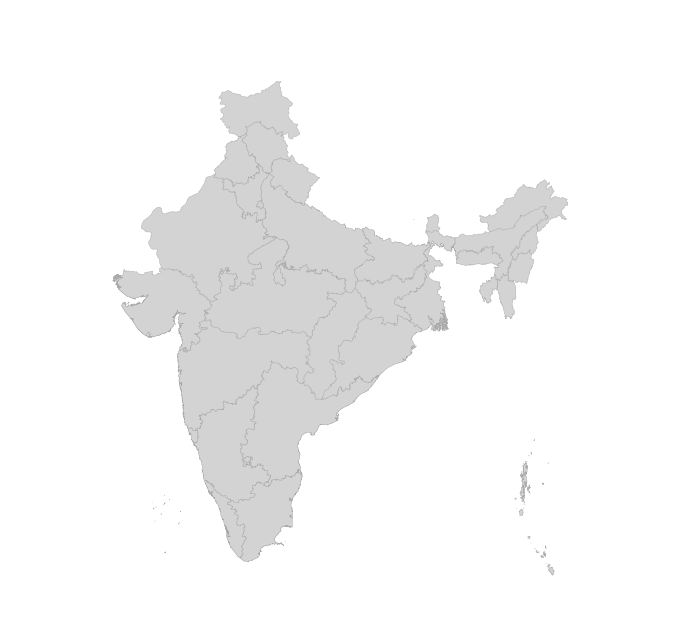

In [104]:
geoplot.polyplot(df, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))

# Comparison based on regions

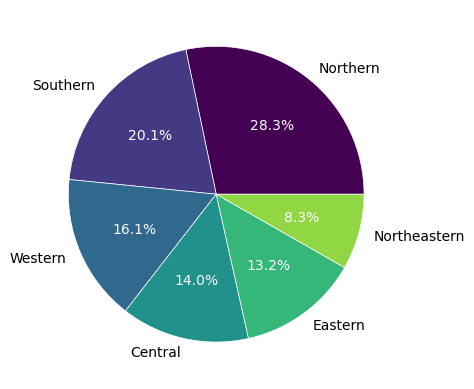

In [105]:
# grouping states region wise based on national share -> summing national share values -> sorting in descending order 
region_wise = main_df.groupby('Region')['National Share (%)'].sum().sort_values(ascending = False)
labels_pie = region_wise.index # to access the region names

fig1, ax1 = plt.subplots()

theme = plt.get_cmap('viridis')
ax1.set_prop_cycle("color", [theme(1. * i / len(region_wise))
                             for i in range(len(region_wise))])

_,_, autotexts = plt.pie(region_wise, labels = labels_pie, autopct='%1.1f%%', wedgeprops = {"edgecolor" : "white",
                      'linewidth': 0.5,
                      'antialiased': True})  # (patches, texts, autotexts) are returned 
                                                                               # autotexts is a list of Text instances for the numeric labels

# changing color of autotexts to white
for autotext in autotexts:
    autotext.set_color('white')            

# plt.title('Power production - region wise', fontsize=15) # setting title to pie chart


##### Area of regions - pie chart

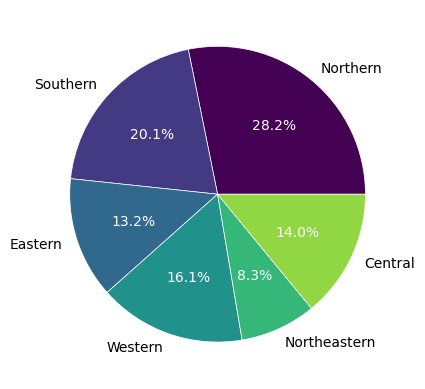

In [106]:
# region_area = 
temp_north_area = 0
temp_east_area = 0
temp_west_area = 0
temp_south_area = 0
temp_central_area = 0
temp_north_east_area = 0
area_tot = 0

for i in range(len(main_df)):
    if main_df['Region'][i] == 'Northern':
        temp_north_area += main_df['Area (km2)'][i]
        area_tot += main_df['Area (km2)'][i]

    elif main_df['Region'][i] == 'Eastern':
        temp_east_area += main_df['Area (km2)'][i]
        area_tot += main_df['Area (km2)'][i]  

    elif main_df['Region'][i] == 'Western':
        temp_west_area += main_df['Area (km2)'][i]
        area_tot += main_df['Area (km2)'][i]      

    elif main_df['Region'][i] == 'Southern':
        temp_south_area += main_df['Area (km2)'][i]
        area_tot += main_df['Area (km2)'][i]              

    elif main_df['Region'][i] == 'Central':
        temp_central_area += main_df['Area (km2)'][i]
        area_tot += main_df['Area (km2)'][i]  

    else:
        temp_north_east_area += main_df['Area (km2)'][i]
        area_tot += main_df['Area (km2)'][i]      

region_names = np.array(['Northern', 'Southern', 'Eastern', 'Western', 'Northeastern', 'Central'])
region_area = np.array([temp_north_area, temp_south_area, temp_east_area, temp_west_area, temp_north_east_area, temp_central_area])

fig1, ax1 = plt.subplots()

theme = plt.get_cmap('viridis')
ax1.set_prop_cycle("color", [theme(1. * i / len(region_wise))
                             for i in range(len(region_wise))])

_,_, autotexts = plt.pie(region_area, labels = region_names, autopct='%1.1f%%', wedgeprops = {"edgecolor" : "white",
                      'linewidth': 0.5,
                      'antialiased': True})  # (patches, texts, autotexts) are returned 
                                                                               # autotexts is a list of Text instances for the numeric labels

# changing color of autotexts to white
for autotext in autotexts:
    autotext.set_color('white')            

# plt.title('Area distribution - region wise', fontsize=15) # setting title to pie chart

##### Top 10 energy producing states

In [107]:
top_states_name = main_df['State / Union territory (UT)'][0:11]
top_states_share = main_df['National Share (%)'][0:11]

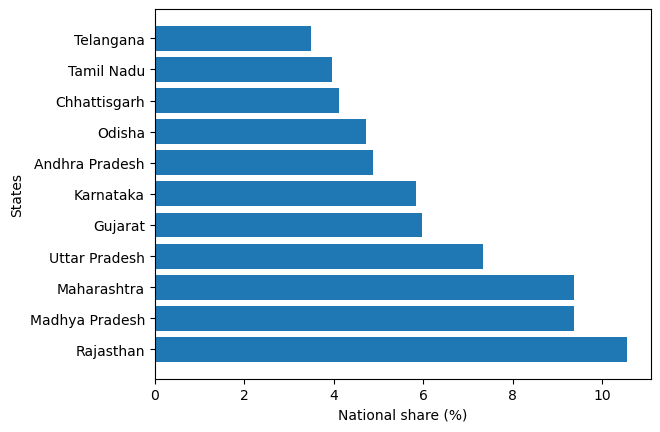

In [108]:
plt.barh(top_states_name, top_states_share)
plt.xlabel('National share (%)')
plt.ylabel('States')

# plt.title('Top 10 power producing states of India')

# Time series part

In [109]:
data1 = pd.read_csv(r'\file_02.csv')
data1.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,01-09-17,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,01-09-17,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,01-09-17,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,01-09-17,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,01-09-17,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [110]:
data1.isnull().sum()

index                                      0
Date                                       0
Region                                     0
Thermal Generation Actual (in MU)          0
Thermal Generation Estimated (in MU)       0
Nuclear Generation Actual (in MU)       1978
Nuclear Generation Estimated (in MU)    1978
Hydro Generation Actual (in MU)            0
Hydro Generation Estimated (in MU)         0
dtype: int64

In [111]:
mean_imputer = SimpleImputer(strategy='mean')
data1['Nuclear Generation Actual (in MU)'] = mean_imputer.fit_transform(data1['Nuclear Generation Actual (in MU)'].values.reshape(-1,1))
data1['Nuclear Generation Estimated (in MU)'] = mean_imputer.fit_transform(data1['Nuclear Generation Estimated (in MU)'].values.reshape(-1,1))
data1

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,01-09-17,Northern,624.23,484.21,30.360000,35.570000,273.27,320.81
1,1,01-09-17,Western,"1,106.89","1,024.33",25.170000,3.810000,72.00,21.53
2,2,01-09-17,Southern,576.66,578.55,62.730000,49.800000,111.57,64.78
3,3,01-09-17,Eastern,441.02,429.39,37.242208,36.987877,85.94,69.36
4,4,01-09-17,NorthEastern,29.11,15.91,37.242208,36.987877,24.64,21.21
...,...,...,...,...,...,...,...,...,...
4940,305,01-08-20,Northern,669.47,602.96,26.880000,23.410000,348.72,351.98
4941,306,01-08-20,Western,"1,116.00","1,262.10",42.370000,36.630000,54.67,20.28
4942,307,01-08-20,Southern,494.66,415.53,61.830000,26.280000,93.49,77.25
4943,308,01-08-20,Eastern,482.86,547.03,37.242208,36.987877,87.22,93.78


In [112]:
data1['Date']

0       01-09-17
1       01-09-17
2       01-09-17
3       01-09-17
4       01-09-17
          ...   
4940    01-08-20
4941    01-08-20
4942    01-08-20
4943    01-08-20
4944    01-08-20
Name: Date, Length: 4945, dtype: object

In [113]:
# converting the data1['date'] column from "object" datatype to "datetime64[ns]" datatype
data1['Date'] = pd.to_datetime(data1['Date'], dayfirst = True)
data1['Date']

0      2017-09-01
1      2017-09-01
2      2017-09-01
3      2017-09-01
4      2017-09-01
          ...    
4940   2020-08-01
4941   2020-08-01
4942   2020-08-01
4943   2020-08-01
4944   2020-08-01
Name: Date, Length: 4945, dtype: datetime64[ns]

In [114]:
data1['Thermal Generation Actual (in MU)']

0         624.23
1       1,106.89
2         576.66
3         441.02
4          29.11
          ...   
4940      669.47
4941    1,116.00
4942      494.66
4943      482.86
4944       34.42
Name: Thermal Generation Actual (in MU), Length: 4945, dtype: object

In [115]:
# removing entries like 1,024.33 MU from values in 'Thermal Generation Estimated (in MU)' col
data1['Thermal Generation Estimated (in MU)'] = data1['Thermal Generation Estimated (in MU)'].str.replace(',','').astype('float')
data1['Thermal Generation Estimated (in MU)']

0        484.21
1       1024.33
2        578.55
3        429.39
4         15.91
         ...   
4940     602.96
4941    1262.10
4942     415.53
4943     547.03
4944      32.81
Name: Thermal Generation Estimated (in MU), Length: 4945, dtype: float64

In [116]:
data1['Thermal Generation Actual (in MU)'] = data1['Thermal Generation Actual (in MU)'].str.replace(',','').astype('float')
data1['Thermal Generation Actual (in MU)']

0        624.23
1       1106.89
2        576.66
3        441.02
4         29.11
         ...   
4940     669.47
4941    1116.00
4942     494.66
4943     482.86
4944      34.42
Name: Thermal Generation Actual (in MU), Length: 4945, dtype: float64

In [117]:
data1['Date'].iloc[4634]

Timestamp('2020-03-17 00:00:00')

In [118]:
temp = 0 # to only traverse 5 entries in the dataset so that we don't 
         # waste time traversing the entire dataset
dict_j = {'Date':[], 'Thermal gen actual':[], 'Thermal gen estimated':[], 'Nuclear gen actual':[], 'Nuclear gen estimated':[], 'Hydro gen actual':[], 'Hydro gen estimated':[]}
df_j = pd.DataFrame(dict_j)

start_date = data1['Date'][0]
end_date = data1['Date'].iloc[4634]
delta = timedelta(days=1)

while start_date <= end_date:
    sum_th_act = 0
    sum_th_est = 0

    sum_nuc_act = 0
    sum_nuc_est = 0

    sum_hydro_act = 0
    sum_hydro_est = 0        

    for i in range(temp, temp+5):
        if data1['Date'][i] == start_date:
            sum_th_act = sum_th_act + data1['Thermal Generation Actual (in MU)'][i]
            sum_th_est = sum_th_est + data1['Thermal Generation Estimated (in MU)'][i]       

            sum_nuc_act = sum_nuc_act + data1['Nuclear Generation Actual (in MU)'][i]
            sum_nuc_est = sum_nuc_est + data1['Nuclear Generation Estimated (in MU)'][i] 

            sum_hydro_act = sum_hydro_act + data1['Hydro Generation Actual (in MU)'][i]
            sum_hydro_est = sum_hydro_est + data1['Hydro Generation Estimated (in MU)'][i]                         
        else:
            continue
        temp = i + 1
    df_j.loc[len(df_j.index)] = [start_date, sum_th_act, sum_th_est, sum_nuc_act, sum_nuc_est, sum_hydro_act, sum_hydro_est] 
    start_date += delta    
    
print(df_j)

          Date  Thermal gen actual  Thermal gen estimated  Nuclear gen actual  \
0   2017-09-01             2777.91                2532.39          192.744415   
1   2017-09-02             2777.91                2563.37          192.744415   
2   2017-09-03             2777.77                2533.23          192.744415   
3   2017-09-04             2777.77                2714.28          192.744415   
4   2017-09-05             2790.85                2779.65          192.744415   
..         ...                 ...                    ...                 ...   
924 2020-03-13             3195.95                2867.95          208.874415   
925 2020-03-14             3193.03                2838.27          208.874415   
926 2020-03-15             3179.11                2712.80          208.874415   
927 2020-03-16             3182.17                2848.42          208.874415   
928 2020-03-17             3182.17                2965.55          213.344415   

     Nuclear gen estimated 

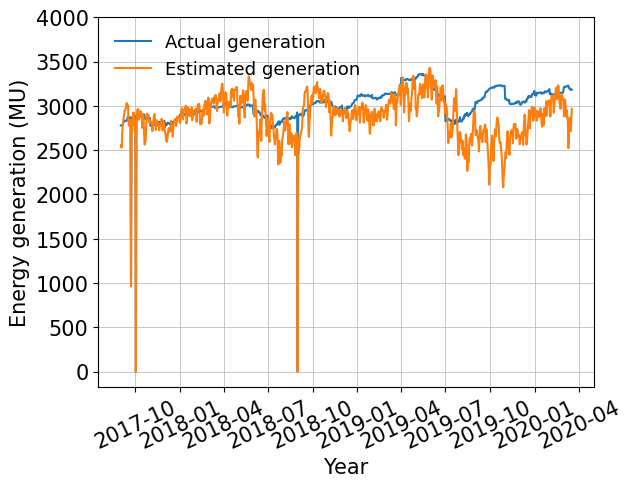

In [119]:
# plt.subplots(figsize=(8,5)) 

plt.plot(df_j['Date'][0:], df_j['Thermal gen actual'][0:], label = 'Actual generation')
plt.plot(df_j['Date'][0:], df_j['Thermal gen estimated'][0:], label = 'Estimated generation')

plt.xticks(rotation=25)
plt.yticks(np.arange(0,4500,500))

plt.xlabel('Year', fontsize = 15)
plt.ylabel('Energy generation (MU)', fontsize = 15)
# plt.title('Thermal power generation comparison', fontsize = 15)

plt.legend(loc='upper left', prop={'size': 13},labelspacing=0.5,frameon=False)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.grid(linewidth = 0.5)
# plt.show()


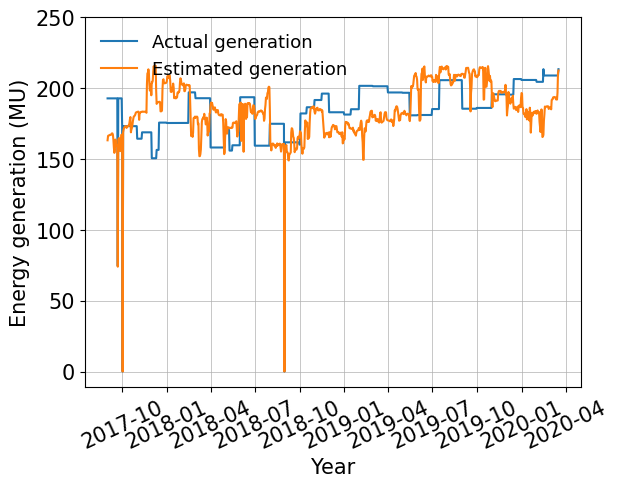

In [120]:
plt.plot(df_j['Date'][0:], df_j['Nuclear gen actual'][0:], label = 'Actual generation')
plt.plot(df_j['Date'][0:], df_j['Nuclear gen estimated'][0:], label = 'Estimated generation')

plt.xticks(rotation=25)
plt.yticks(np.arange(0,300,50))

plt.xlabel('Year', fontsize = 15)
plt.ylabel('Energy generation (MU)', fontsize = 15)
# plt.title('Nuclear power generation comparison', fontsize = 15)

plt.legend(loc='upper left', prop={'size': 13},labelspacing=0.5,frameon=False)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.grid(linewidth = 0.5)
# plt.show()

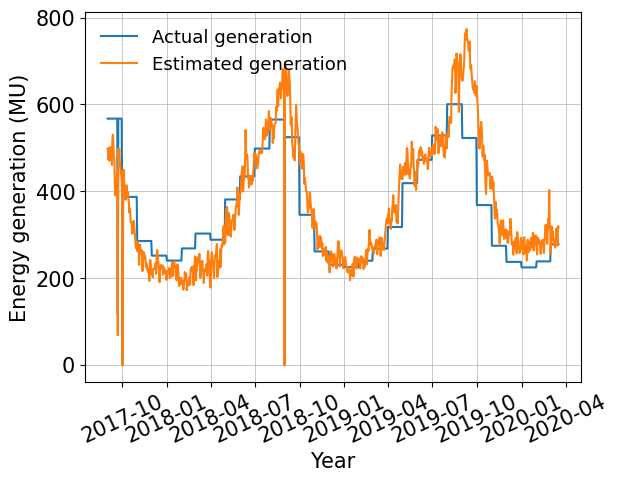

In [121]:
plt.plot(df_j['Date'][0:], df_j['Hydro gen actual'][0:], label = 'Actual generation')
plt.plot(df_j['Date'][0:], df_j['Hydro gen estimated'][0:], label = 'Estimated generation')

plt.xticks(rotation=25)

plt.xlabel('Year', fontsize = 15)
plt.ylabel('Energy generation (MU)', fontsize = 15)
# plt.title('Hydro power generation comparison', fontsize = 15)

plt.legend(loc='upper left', prop={'size': 13},labelspacing=0.5,frameon=False)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.grid(linewidth = 0.5)
# plt.show()

## Proper code to compare the yearly production of energy in India

In [122]:
year = np.arange(2017,2021,1)
thermal_gen_act = np.zeros(len(year))
thermal_gen_est = np.zeros(len(year))

nuc_gen_act = np.zeros(len(year))
nuc_gen_est = np.zeros(len(year))

hydro_gen_act = np.zeros(len(year))
hydro_gen_est = np.zeros(len(year))

temp_year = 2017

for i in range(len(year)):
    sum_ther_act = 0
    sum_ther_est = 0

    sum_nuc_act = 0
    sum_nuc_est = 0    

    sum_hydro_act = 0
    sum_hydro_est = 0

    if temp_year > 2020:
        break
    else:
        for j in range(len(data1)):
            if data1['Date'][j].year == temp_year:
                sum_ther_act = sum_ther_act + data1['Thermal Generation Actual (in MU)'][j]
                sum_ther_est = sum_ther_est + data1['Thermal Generation Estimated (in MU)'][j]
                thermal_gen_act[i] = sum_ther_act
                thermal_gen_est[i] = sum_ther_est

                sum_nuc_act = sum_nuc_act + data1['Nuclear Generation Actual (in MU)'][j]
                sum_nuc_est = sum_nuc_est + data1['Nuclear Generation Estimated (in MU)'][j]
                nuc_gen_act[i] = sum_nuc_act
                nuc_gen_est[i] = sum_nuc_est                

                sum_hydro_act = sum_hydro_act + data1['Hydro Generation Actual (in MU)'][j]
                sum_hydro_est = sum_hydro_est + data1['Hydro Generation Estimated (in MU)'][j]
                hydro_gen_act[i] = sum_hydro_act
                hydro_gen_est[i] = sum_hydro_est                
            else:
                continue   
        temp_year += 1

# Note: data for 2017 is only from Sept to Dec end (4 months). Assuming the production for the rest of 
# three-quarters of the year is almost equal to this Sept-Dec quarter, the energy production for 
# 2017 has been multiplied by 3 (12 months/4 months in a quarter)

thermal_gen_act[0] = thermal_gen_act[0]*3
thermal_gen_est[0] = thermal_gen_est[0]*3

nuc_gen_act[0] = nuc_gen_act[0]*3
nuc_gen_est[0] = nuc_gen_est[0]*3

hydro_gen_act[0] = hydro_gen_act[0]*3
hydro_gen_est[0] = hydro_gen_est[0]*3

# Note: data for 2020 is from Jan 1 - Mar 31. Then again from Jun 1 - Aug 1 (139 days). 
# Assuming the production for the rest of  year is almost equal to this irregular time frame, 
# the energy production for 2020 has been multiplied by 2.63 (366 days/139 days)

thermal_gen_act[-1] = thermal_gen_act[-1]*2.63
thermal_gen_est[-1] = thermal_gen_est[-1]*2.63

nuc_gen_act[-1] = nuc_gen_act[-1]*2.63
nuc_gen_est[-1] = nuc_gen_est[-1]*2.63

hydro_gen_act[-1] = hydro_gen_act[-1]*2.63
hydro_gen_est[-1] = hydro_gen_est[-1]*2.63

print("th actual", thermal_gen_act)
print("th est", thermal_gen_est)

print("nuc actual", nuc_gen_act)
print("nuc est", nuc_gen_est)

print("hydro actual", hydro_gen_act)
print("hydro est", hydro_gen_est)

th actual [1022308.35       1073156.97       1134669.30999999 1152143.1675    ]
th est [1013223.36   1068919.22   1043963.1    1038075.2283]
nuc actual [62922.49273003 64395.59714526 70622.4215605  74088.50367718]
nuc est [65851.03844287 64534.46419616 70581.60994944 67955.59612882]
hydro actual [133693.59   131759.56   136449.66   130774.1989]
hydro est [115652.4   130575.03  153163.83  151747.844]


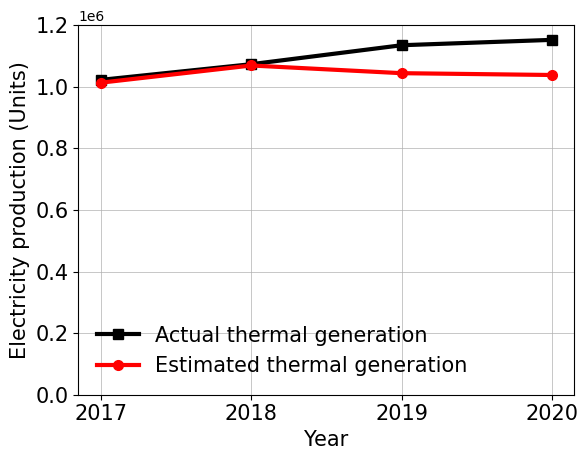

In [123]:
plt.plot(year, thermal_gen_act, '-sk', label = 'Actual thermal generation', linewidth = 3, markersize = 7)
plt.plot(year, thermal_gen_est, '-or', label = 'Estimated thermal generation', linewidth = 3, markersize = 7)

plt.yticks(np.arange(0,1.3,0.2)*1e6)
plt.xticks(np.arange(2017,2021,1))

plt.xlabel('Year', fontsize = 15)
plt.ylabel('Electricity production (Units)', fontsize = 15)
# plt.title('Thermal power production comparison', fontsize = 15)

# plt.yticks(np.arange(0,17,4)*1e4)
plt.xticks(np.arange(2017,2021,1))

plt.legend(loc='best', prop={'size': 15},labelspacing=0.5,frameon=False)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.grid(linewidth = 0.5)
# plt.show()


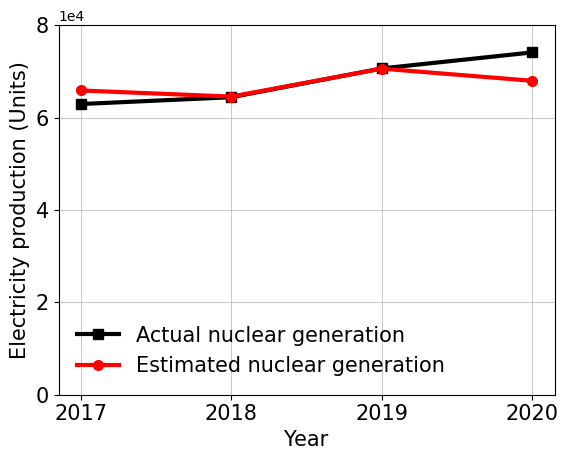

In [124]:
plt.plot(year, nuc_gen_act, '-sk', label = 'Actual nuclear generation', linewidth = 3, markersize = 7)
plt.plot(year, nuc_gen_est, '-or', label = 'Estimated nuclear generation', linewidth = 3, markersize = 7)

plt.yticks(np.arange(0,9,2)*1e4)
plt.xticks(np.arange(2017,2021,1))

plt.xlabel('Year', fontsize = 15)
plt.ylabel('Electricity production (Units)', fontsize = 15)
# plt.title('Nuclear power production comparison', fontsize = 15)

# plt.yticks(np.arange(0,17,4)*1e4)
plt.xticks(np.arange(2017,2021,1))

plt.legend(loc='best', prop={'size': 15},labelspacing=0.5,frameon=False)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.grid(linewidth = 0.5)
# plt.show()

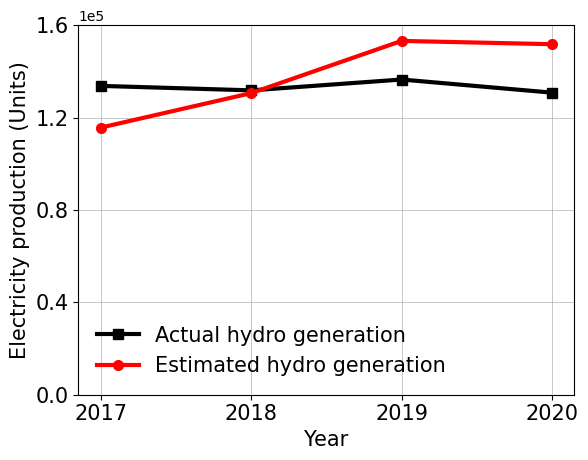

In [125]:
plt.plot(year, hydro_gen_act, '-sk', label = 'Actual hydro generation', linewidth = 3, markersize = 7)
plt.plot(year, hydro_gen_est, '-or', label = 'Estimated hydro generation', linewidth = 3, markersize = 7)

plt.xlabel('Year', fontsize = 15)
plt.ylabel('Electricity production (Units)', fontsize = 15)
# plt.title('Hydro power production comparison', fontsize = 15)

plt.yticks(np.arange(0,17,4)*1e4)
plt.xticks(np.arange(2017,2021,1))

plt.legend(loc='best', prop={'size': 15},labelspacing=0.5,frameon=False)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)

plt.grid(linewidth = 0.5)
# plt.show()

## Comparison with GOI data
### GOI data (Page 31 of 2021-22 report)

### Fossil fuel production comparison

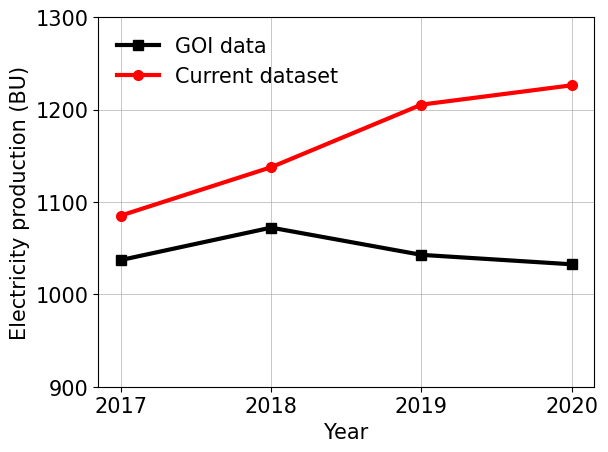

In [126]:
fossil_gen_official = np.array([1037.1, 1072.2, 1042.7, 1032.5])

non_renew_gen_act = np.add(thermal_gen_act, nuc_gen_act)

plt.plot(year, fossil_gen_official, '-sk', label = 'GOI data', linewidth = 3, markersize = 7)
plt.plot(year, non_renew_gen_act*1e-3, '-or', label = 'Current dataset', linewidth = 3, markersize = 7)

plt.xlabel('Year', fontsize = 15)
plt.ylabel('Electricity production (BU)', fontsize = 15)
# plt.title('Thermal power production comparison', fontsize = 15)

plt.xticks(np.arange(2017,2021,1))
plt.yticks(np.arange(900,1400,100))

plt.legend(loc='best', prop={'size': 15},labelspacing=0.5,frameon=False)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)

plt.grid(linewidth = 0.5)
# plt.show()

In [127]:
error_pct_non_renew = np.divide(np.abs(np.subtract(fossil_gen_official, non_renew_gen_act*1e-3)), fossil_gen_official)*100
error_pct_non_renew

array([ 4.64090664,  6.0951844 , 15.59333764, 18.76335798])

### Non-fossil fuel production comparison

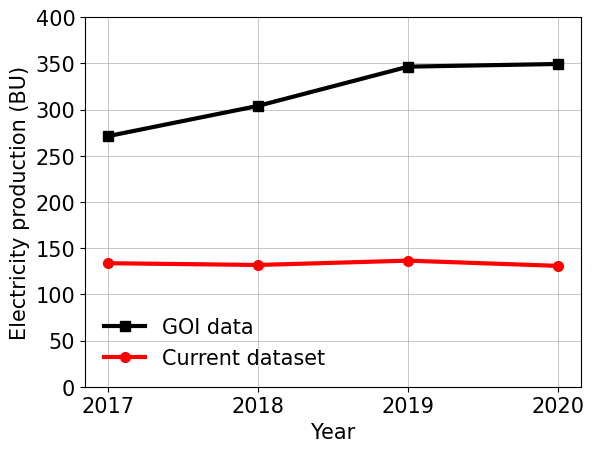

In [128]:
renew_gen_official = np.array([271.1, 303.9, 346.4, 349.3])

renew_gen_act = hydro_gen_act

plt.plot(year, renew_gen_official, '-sk', label = 'GOI data', linewidth = 3, markersize = 7)
plt.plot(year, renew_gen_act*1e-3, '-or', label = 'Current dataset', linewidth = 3, markersize = 7)

plt.xlabel('Year', fontsize = 15)
plt.ylabel('Electricity production (BU)', fontsize = 15)
# plt.title('Renewable energy production comprison', fontsize = 15)

plt.xticks(np.arange(2017,2021,1))
plt.yticks(np.arange(0,450,50))

plt.legend(loc='best', prop={'size': 15},labelspacing=0.5,frameon=False)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)

plt.grid(linewidth = 0.5)
# plt.show()

In [129]:
error_pct_renew = np.divide(np.abs(np.subtract(renew_gen_official, renew_gen_act*1e-3)), renew_gen_official)*100
error_pct_renew

array([50.68476946, 56.64377756, 60.60922055, 62.5610653 ])

### Total production comparison

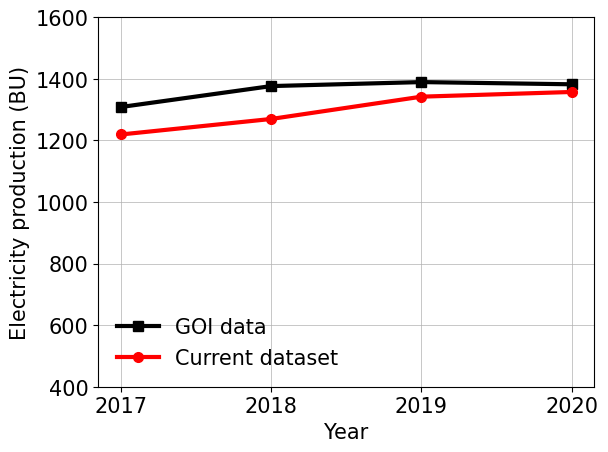

In [130]:
tot_gen_official = np.array([1308.1, 1376.1, 1389.1, 1381.9])

tot_gen_act = np.add(thermal_gen_act, np.add(hydro_gen_act, nuc_gen_act))

plt.plot(year, tot_gen_official, '-sk', label = 'GOI data', linewidth = 3, markersize = 7)
plt.plot(year, tot_gen_act*1e-3, '-or', label = 'Current dataset', linewidth = 3, markersize = 7)

plt.xlabel('Year', fontsize = 15)
plt.ylabel('Electricity production (BU)', fontsize = 15)
# plt.title('Total electricity production comprison', fontsize = 15)

plt.xticks(np.arange(2017,2021,1))
plt.yticks(np.arange(400,1700,200))

plt.legend(loc='best', prop={'size': 15},labelspacing=0.5,frameon=False)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)

plt.grid(linewidth = 0.5)
# plt.show()

In [131]:
error_pct_tot = np.divide(np.abs(np.subtract(tot_gen_official, tot_gen_act*1e-3)), tot_gen_official)*100
error_pct_tot

array([6.81718273, 7.76018261, 3.40930159, 1.80144221])

### Data that says there is energy shortage in India

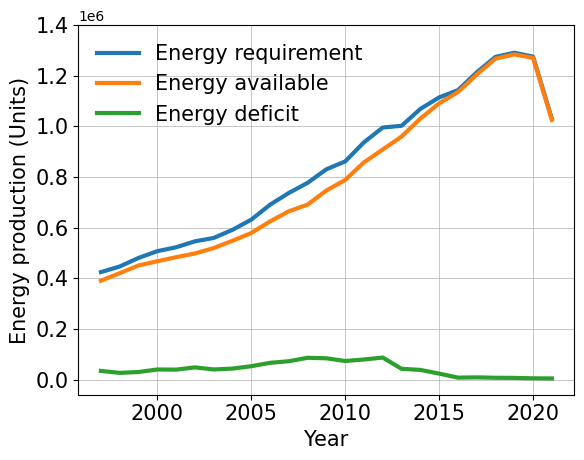

In [132]:
req_energy_official = np.array([424505, 446584, 480430, 507216, 522537, 545983, 559264, 591373, 631554, 690587, 737052, 777039, 830594, 861591, 937199, 995557, 1002257, 1068923, 1114408, 1142929, 1213326, 1274595, 1291010, 1275534, 1030128]) # in BU
avail_energy_official = np.array([390330, 420235, 450594, 467400, 483350, 497890, 519398, 548115, 578819, 624495, 664660, 691038, 746644, 788355, 857886, 908652, 959829, 1030785, 1090850, 1135334, 1204697, 1267526, 1284444, 1270663, 1025706]) # in BU
energy_deficit_official = np.subtract(req_energy_official, avail_energy_official)
year = np.arange(1997, 2022, 1)

# plt.subplots(figsize=(5,5)) 
plt.plot(year, req_energy_official, label = 'Energy requirement', linewidth = 3)
plt.plot(year, avail_energy_official, label = 'Energy available', linewidth = 3)
plt.plot(year, energy_deficit_official, label = 'Energy deficit', linewidth = 3)

plt.legend(loc='best', prop={'size': 15},labelspacing=0.5,frameon=False)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)

plt.xlabel('Year', fontsize = 15)
plt.ylabel('Energy production (Units)', fontsize = 15)
# plt.title('Energy portfolio in India 1997 - Dec 2021', fontsize = 15)
plt.yticks(np.arange(0,1.5,0.2)*1e6)

plt.grid(linewidth = 0.5)
# plt.show()

### Pie chart showing thermal production is the max in the country

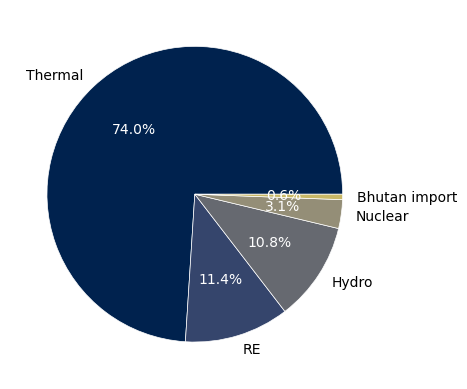

In [133]:
official_energy_split = np.array([913.19, 141.28, 133.74, 38.80, 7.28]) # BU
total_prod = 1234.3 # BU
percent_energy_split = np.divide(official_energy_split, total_prod)*1e2
label_official = np.array(['Thermal', 'RE', 'Hydro', 'Nuclear', 'Bhutan import'])

# test_df = pd.DataFrame({'Share': percent_energy_split}, index = label_official)

fig1, ax1 = plt.subplots()

theme = plt.get_cmap('cividis')
ax1.set_prop_cycle("color", [theme(1. * i / len(percent_energy_split))
                             for i in range(len(percent_energy_split))])

_,_, autotexts = plt.pie(percent_energy_split, labels = label_official, autopct='%1.1f%%', wedgeprops = {"edgecolor" : "white",
                      'linewidth': 0.5,
                      'antialiased': True})  # (patches, texts, autotexts) are returned 
                                                                               # autotexts is a list of Text instances for the numeric labels

# changing color of autotexts to white
for autotext in autotexts:
    autotext.set_color('white')            

# plt.title('Electricity genration during 2021-22 (Upto Jan) GOI data', fontsize=15) # setting title to pie chart

### Time series analysis

In [134]:
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
from pylab import rcParams

#### Augmented Dickey-Fuller test

In [137]:
adf_th = adfuller(df_j['Thermal gen actual'])
print('Thermal power generation ADF stats')
print('ADF Statistic: {}'.format(adf_th[0]))
print('p-value: {}'.format(adf_th[1]))
print('Critical Values:')
for key, value in adf_th[4].items():
    print('\t{}: {}'.format(key, value))

adf_nuc = adfuller(df_j['Nuclear gen actual'])
print('\nNuclear power generation ADF stats')
print('ADF Statistic: {}'.format(adf_nuc[0]))
print('p-value: {}'.format(adf_nuc[1]))
print('Critical Values:')
for key, value in adf_nuc[4].items():
    print('\t{}: {}'.format(key, value))   

adf_hyd = adfuller(df_j['Hydro gen actual'])
print('\nHydro power generation ADF stats')
print('ADF Statistic: {}'.format(adf_hyd[0]))
print('p-value: {}'.format(adf_hyd[1]))
print('Critical Values:')
for key, value in adf_hyd[4].items():
    print('\t{}: {}'.format(key, value))      

Thermal power generation ADF stats
ADF Statistic: -2.350192018700806
p-value: 0.15629037373444654
Critical Values:
	1%: -3.437485646962348
	5%: -2.8646901138095378
	10%: -2.568447319459459

Nuclear power generation ADF stats
ADF Statistic: -2.7394336892364612
p-value: 0.06745953867191355
Critical Values:
	1%: -3.437501253878553
	5%: -2.864696995470416
	10%: -2.568450985005155

Hydro power generation ADF stats
ADF Statistic: -2.082086079156348
p-value: 0.25177861843623783
Critical Values:
	1%: -3.4374934418959495
	5%: -2.8646935508856495
	10%: -2.568449150231867


#### Thermal energy production

In [138]:
temp_th_ts = df_j['Thermal gen actual'] # ts = time series
temp_th_ts.describe()
var_th_ts = temp_th_ts.to_numpy() # var = variable
var_th_ts

array([2777.91, 2777.91, 2777.77, 2777.77, 2790.85, 2808.53, 2818.06,
       2828.45, 2834.33, 2826.12, 2829.37, 2829.37, 2834.15, 2839.56,
       2866.57, 2879.78, 2870.9 , 2870.9 , 2870.9 , 2855.63, 2867.83,
       1072.53, 2862.32, 2866.75, 2870.58, 2873.18, 2873.18, 2877.07,
       2887.58, 2887.58, 2861.41,    0.  , 2861.41, 2861.41, 2856.93,
       2862.54, 2862.54, 2871.42, 2875.9 , 2875.9 , 2891.9 , 2891.9 ,
       2891.9 , 2888.86, 2899.42, 2900.38, 2903.42, 2890.42, 2902.9 ,
       2865.08, 2854.03, 2849.46, 2857.77, 2855.29, 2865.16, 2865.16,
       2867.24, 2856.31, 2856.31, 2856.31, 2863.31, 2772.42, 2772.42,
       2773.81, 2773.81, 2776.  , 2776.  , 2779.75, 2789.54, 2792.04,
       2786.93, 2786.93, 2784.43, 2773.43, 2774.98, 2783.26, 2790.72,
       2785.34, 2782.35, 2820.02, 2786.91, 2786.41, 2776.86, 2795.36,
       2795.36, 2800.01, 2802.92, 2821.83, 2824.49, 2825.14, 2828.47,
       2761.11, 2782.41, 2783.93, 2797.29, 2787.79, 2807.34, 2807.34,
       2807.34, 2802

In [139]:
th_time_series = pd.Series(var_th_ts, index=pd.date_range("2017-09-01", periods = len(var_th_ts), freq="D"), name = "Time series of thermal power production")
# date in YYYY-MM-DD format
# periods = 'D' as we have data for every day
# name = 'Time series of thermal power production' is the name that will appear at the top of plot

# Source: https://www.statsmodels.org/stable/examples/notebooks/generated/stl_decomposition.html

In [140]:
th_time_series

2017-09-01    2777.91
2017-09-02    2777.91
2017-09-03    2777.77
2017-09-04    2777.77
2017-09-05    2790.85
               ...   
2020-03-13    3195.95
2020-03-14    3193.03
2020-03-15    3179.11
2020-03-16    3182.17
2020-03-17    3182.17
Freq: D, Name: Time series of thermal power production, Length: 929, dtype: float64

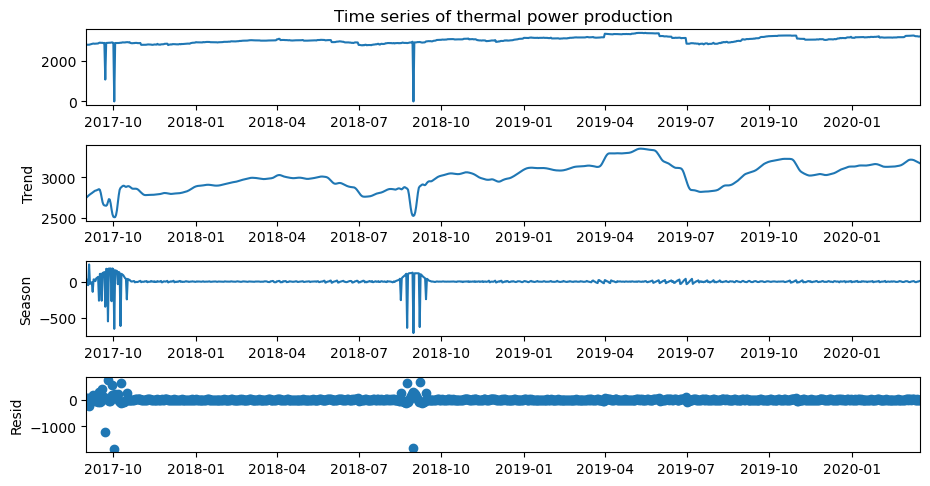

In [141]:
from statsmodels.tsa.seasonal import STL

stl = STL(th_time_series)
res = stl.fit()
fig = res.plot()

# changing width and height to make space for the large xticks
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(10)

#### Nuclear energy production

In [142]:
temp_nuc_ts = df_j['Nuclear gen actual'] # ts = time series
temp_nuc_ts.describe()
var_nuc_ts = temp_nuc_ts.to_numpy() # var = variable
var_nuc_ts

array([192.74441523, 192.74441523, 192.74441523, 192.74441523,
       192.74441523, 192.74441523, 192.74441523, 192.74441523,
       192.74441523, 192.74441523, 192.74441523, 192.74441523,
       192.74441523, 192.74441523, 192.74441523, 192.74441523,
       192.74441523, 192.74441523, 192.74441523, 192.74441523,
       192.74441523,  74.48441523, 192.74441523, 192.74441523,
       192.74441523, 192.74441523, 192.74441523, 192.74441523,
       192.74441523, 192.74441523, 173.14441523,   0.        ,
       173.14441523, 173.14441523, 173.14441523, 173.14441523,
       173.14441523, 173.14441523, 173.14441523, 173.14441523,
       173.14441523, 173.14441523, 173.14441523, 173.14441523,
       173.14441523, 173.14441523, 173.14441523, 173.14441523,
       173.14441523, 173.14441523, 173.14441523, 173.14441523,
       173.14441523, 173.14441523, 173.14441523, 173.14441523,
       173.14441523, 173.14441523, 173.14441523, 173.14441523,
       173.14441523, 164.28441523, 164.28441523, 164.28

In [143]:
nuc_time_series = pd.Series(var_nuc_ts, index=pd.date_range("2017-09-01", periods = len(var_nuc_ts), freq="D"), name = "Time series of nuclear power production")
# date in YYYY-MM-DD format
# periods = 'D' as we have data for every day
# name = 'Time series of nuclear power production' is the name that will appear at the top of plot

In [144]:
nuc_time_series

2017-09-01    192.744415
2017-09-02    192.744415
2017-09-03    192.744415
2017-09-04    192.744415
2017-09-05    192.744415
                 ...    
2020-03-13    208.874415
2020-03-14    208.874415
2020-03-15    208.874415
2020-03-16    208.874415
2020-03-17    213.344415
Freq: D, Name: Time series of nuclear power production, Length: 929, dtype: float64

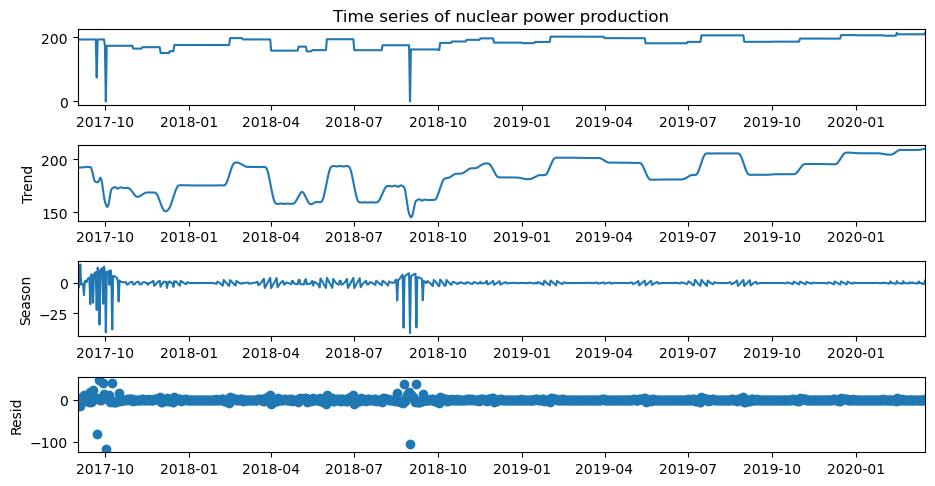

In [145]:
stl = STL(nuc_time_series)
res = stl.fit()
fig = res.plot()

# changing width and height to make space for the large xticks
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(10)

#### Hydro power production

In [146]:
temp_hyd_ts = df_j['Hydro gen actual'] # ts = time series
temp_hyd_ts.describe()
var_hyd_ts = temp_hyd_ts.to_numpy() # var = variable
var_hyd_ts

array([567.42, 567.42, 567.42, 567.42, 567.42, 567.42, 567.42, 567.42,
       567.42, 567.42, 567.42, 567.42, 567.42, 567.42, 567.42, 567.42,
       567.42, 567.42, 567.42, 567.42, 567.42, 116.72, 567.42, 567.42,
       567.42, 567.42, 567.42, 567.42, 567.42, 567.42, 387.16,   0.  ,
       387.16, 387.16, 387.16, 387.16, 387.16, 387.16, 387.16, 387.16,
       387.16, 387.16, 387.16, 387.16, 387.16, 387.16, 387.16, 387.16,
       387.16, 387.16, 387.16, 387.16, 387.16, 387.16, 387.16, 387.16,
       387.16, 387.16, 387.16, 387.16, 387.16, 285.6 , 285.6 , 285.6 ,
       285.6 , 285.6 , 285.6 , 285.6 , 285.6 , 285.6 , 285.6 , 285.6 ,
       285.6 , 285.6 , 285.6 , 285.6 , 285.6 , 285.6 , 285.6 , 285.6 ,
       285.6 , 285.6 , 285.6 , 285.6 , 285.6 , 285.6 , 285.6 , 285.6 ,
       285.6 , 285.6 , 285.6 , 251.93, 251.93, 251.93, 251.93, 251.93,
       251.93, 251.93, 251.93, 251.93, 251.93, 251.93, 251.93, 251.93,
       251.93, 251.93, 251.93, 251.93, 251.93, 251.93, 251.93, 251.93,
      

In [147]:
hyd_time_series = pd.Series(var_hyd_ts, index=pd.date_range("2017-09-01", periods = len(var_hyd_ts), freq="D"), name = "Time series of hydro power production")
# date in YYYY-MM-DD format
# periods = 'D' as we have data for every day
# name = 'Time series of hydro power production' is the name that will appear at the top of plot

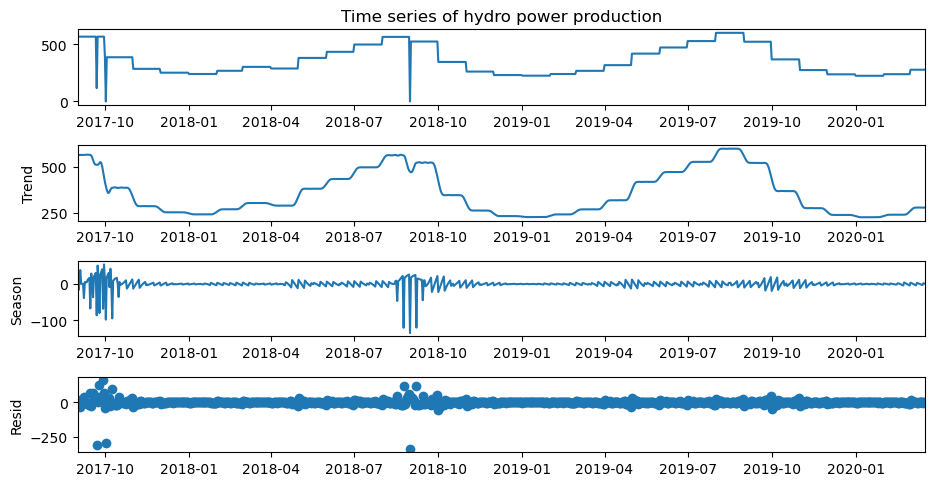

In [148]:
stl = STL(hyd_time_series)
res = stl.fit()
fig = res.plot()

# changing width and height to make space for the large xticks
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(10)

### ACF and PACF

#### Thermal power data

In [149]:
# use data only upto 928th row as data from 18-03-2020 to 31-05-2020 is absent
df_j.iloc[928]

Date                     2020-03-17 00:00:00
Thermal gen actual                   3182.17
Thermal gen estimated                2965.55
Nuclear gen actual                213.344415
Nuclear gen estimated             212.405753
Hydro gen actual                      277.85
Hydro gen estimated                   316.97
Name: 928, dtype: object

In [150]:
test_th_acf = df_j['Thermal gen actual'][0:929]
test_th_acf

0      2777.91
1      2777.91
2      2777.77
3      2777.77
4      2790.85
        ...   
924    3195.95
925    3193.03
926    3179.11
927    3182.17
928    3182.17
Name: Thermal gen actual, Length: 929, dtype: float64

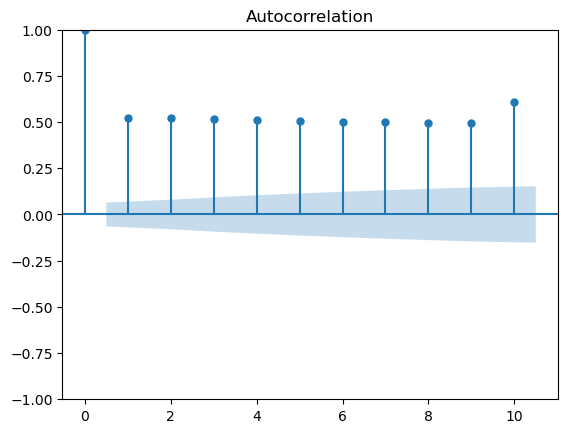

In [151]:
th_acf_values = acf(df_j['Thermal gen actual'])
plot_acf(df_j['Thermal gen actual'], lags=10)

#### Nuclear data

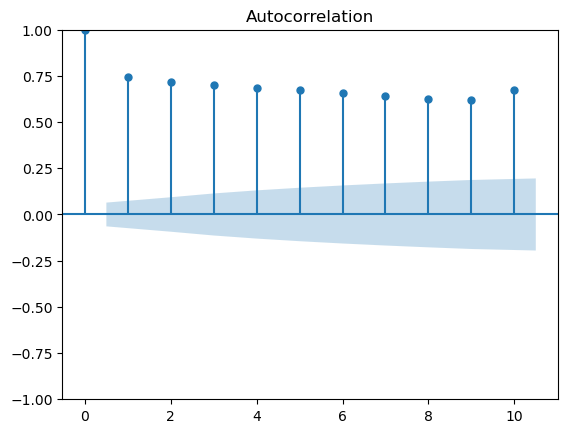

In [152]:
nuc_acf_values = acf(df_j['Nuclear gen actual'])
plot_acf(df_j['Nuclear gen actual'], lags=10)

#### Hydro data

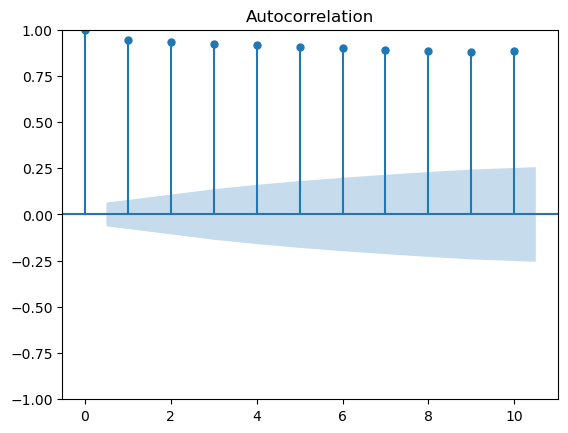

In [153]:
hyd_acf_values = acf(df_j['Hydro gen actual'])
plot_acf(df_j['Hydro gen actual'], lags=10)

### PACF plots

#### Thermal data

c:\Users\Rajath\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


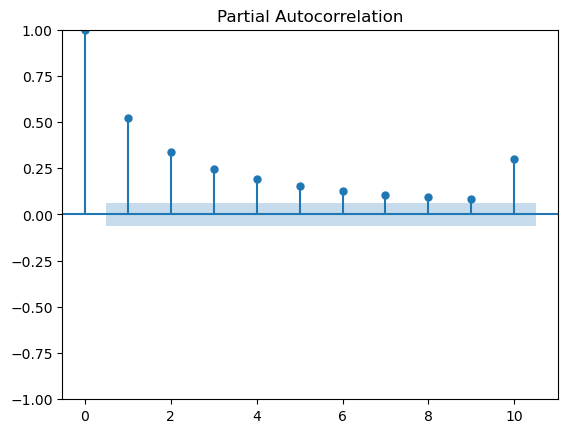

In [154]:
th_pacf_values = pacf(df_j['Thermal gen actual'])
plot_pacf(df_j['Thermal gen actual'], lags=10)

#### Nuclear data

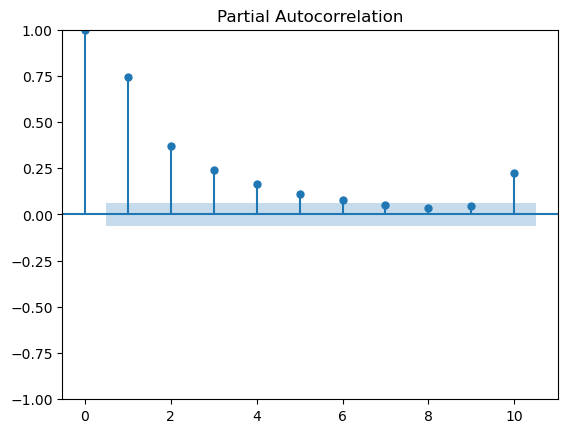

In [155]:
nuc_pacf_values = pacf(df_j['Nuclear gen actual'])
plot_pacf(df_j['Nuclear gen actual'], lags=10)

#### Hydro data

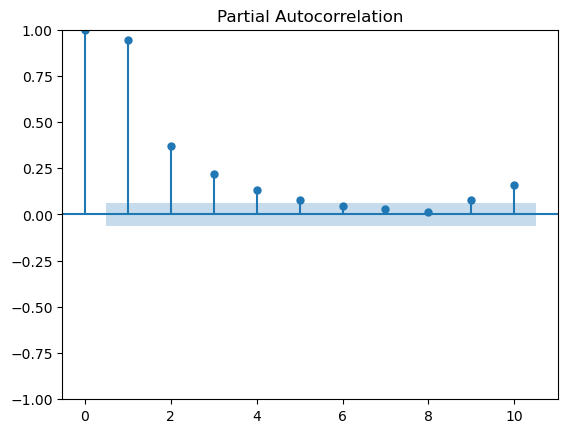

In [156]:
hyd_pacf_values = pacf(df_j['Hydro gen actual'])
plot_pacf(df_j['Hydro gen actual'], lags=10)

### Scatter plot

#### Thermal data

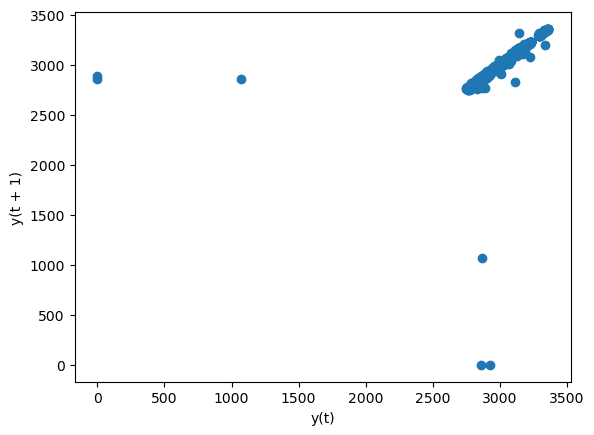

In [157]:
pd.plotting.lag_plot(df_j['Thermal gen actual'])

#### Nuclear data

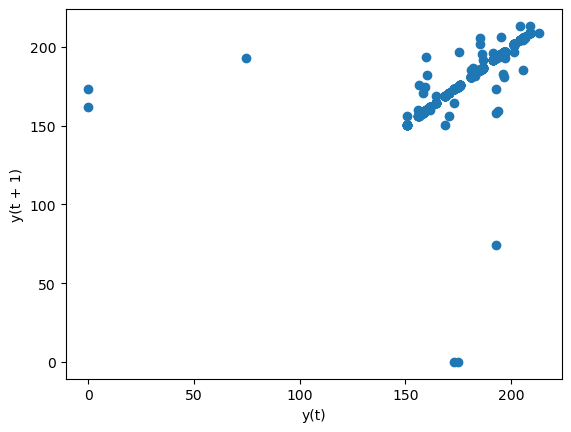

In [158]:
pd.plotting.lag_plot(df_j['Nuclear gen actual'])

#### Hydro data

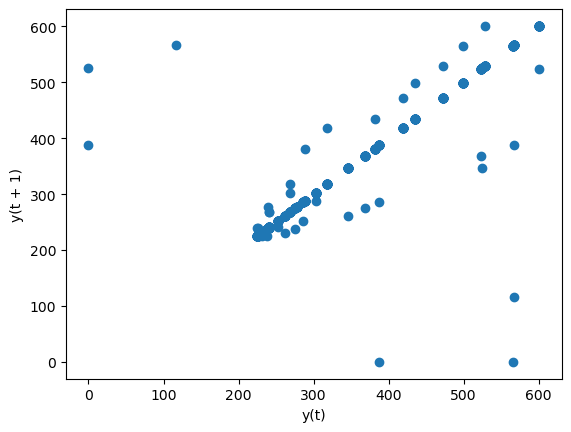

In [159]:
pd.plotting.lag_plot(df_j['Hydro gen actual'])

#### Partial autocorrelations

##### Thermal data

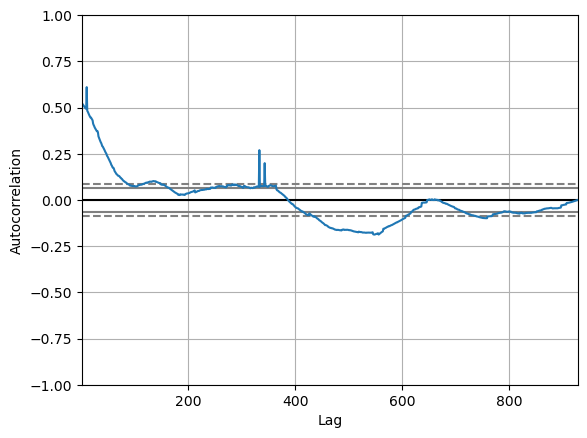

In [160]:
pd.plotting.autocorrelation_plot(df_j['Thermal gen actual'])

##### Nuclear data

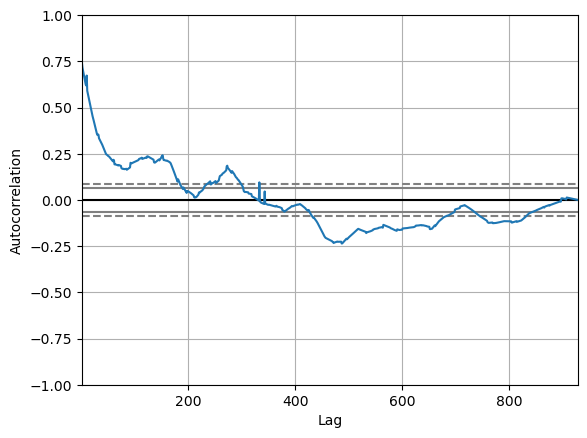

In [161]:
pd.plotting.autocorrelation_plot(df_j['Nuclear gen actual'])

##### Hydro data

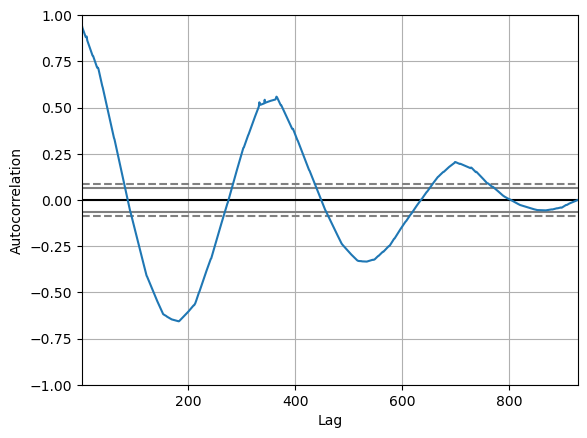

In [162]:
pd.plotting.autocorrelation_plot(df_j['Hydro gen actual'])

In [163]:
df_j['Thermal gen actual'].corr(df_j['Thermal gen actual'].shift(10))

0.6163500372228434